This project involves analyzing and modeling the Iris dataset with the aim of classifying the species of Iris flowers. The dataset includes four features measured from each sample: the lengths and the widths of the sepals and petals, and three species of Iris flowers (Iris Setosa, Iris Versicolor, and Iris Virginica).

## Tools and Libraries

I will be using Python for this project, along with several libraries for data analysis and machine learning. Here are the main libraries we'll be using:

- **Pandas**: For data manipulation and analysis.
- **NumPy**: For numerical computations.
- **Matplotlib and Seaborn**: For data visualization.
- **Scikit-learn**: For machine learning tasks, including data preprocessing, model training, and model evaluation.
- **Linear Discriminant Analysis (LDA)**: Our chosen machine learning model for this project.
- **Stats-model**: For statistical modeling, hypothesis testing, and data exploration.
- **Logistic-Regression**:  Our chosen machine learning model for this project.

## Dataset

The dataset we'll be using includes various features related to Iris flowers. Each row represents a unique Iris flower, and includes measurements such as sepal length, sepal width, petal length, and petal width. It also includes the species of the Iris flower.

## Objective

Our main objective is to build a predictive model that can accurately classify the species of Iris flowers based on the provided features. We'll be using the Linear Discriminant Analysis (LDA) model, a powerful machine learning model that operates by projecting a dataset onto a lower-dimensional space with good class-separability.

## Workflow

Here's a brief overview of our workflow for this project:

1. **Data Loading and Preprocessing**: Load the data and preprocess it for analysis and modeling. This includes handling missing values, encoding categorical variables, and scaling numerical variables.

2. **Exploratory Data Analysis (EDA)**: Explore the data to gain insights and understand the relationships between different features and the species of the Iris flower.

3. **Model Training**: Train the LDA model on the preprocessed data.

4. **Model Evaluation**: Evaluate the model's performance using various metrics, such as accuracy, precision, recall, F1-score, Cohen's Kappa, and Matthews Correlation Coefficient.

5. **Error Analysis**: Analyze the instances where the model made errors to gain insights into potential improvements.

6. **Future Work**: Based on our findings, suggest potential directions for future work.

# sklearn

In [60]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix, cohen_kappa_score, matthews_corrcoef
from sklearn.preprocessing import StandardScaler, label_binarize, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve
from sklearn import model_selection
from sklearn import metrics
from yellowbrick.classifier import ClassificationReport
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
import statsmodels.api as sm
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.linear_model import LogisticRegression

In [2]:
# Load data
data = pd.read_csv('Iris.csv')

In [3]:
data  = data.drop('Id',axis=1)

In [4]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## EDA Overview 

In this project, we delve into the iris dataset, which encompasses various Features such as sepal length, sepal width, petal length, petal width, and different types of iris species. Our primary aim is to explore the dataset, understand its distributions, and uncover patterns and relationships within the data.

The main objectives of this project are threefold:

1. To explore the dataset and comprehend the distributions of the features.

2. To scrutinize the relationships between the features and iris species.

3. To identify clusters within the data using appropriate clustering algorithms.

The insights gleaned from this project could be instrumental in understanding the characteristics and patterns of different iris species.
Moreover, the results could contribute to the development of classification models for iris species prediction and further research in botany and ecology.

### 1. Basic Statistics

In [6]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Inteperet the  Results 

1. `Sepal Length`:

   - The average sepal length across all samples is approximately 5.84 cm, with a standard deviation of 0.83 cm. This means that most sepals are around this length, but there can be a variation of about 0.83 cm.
   - The shortest sepal is 4.3 cm, and the longest is 7.9 cm.
   - The 25%, 50% (median), and 75% percentiles indicate that 50% of the sepals have a length between 5.1 cm and 6.4 cm.


2. `Sepal Width`:

   - The average sepal width is about 3.05 cm, with a standard deviation of 0.43 cm.
   - The narrowest sepal is 2.0 cm, and the widest is 4.4 cm.
   - Half of the sepals have a width between 2.8 cm and 3.3 cm.


3. `Petal Length`:

   - The average petal length is approximately 3.76 cm, with a standard deviation of 1.76 cm, indicating a higher variability in petal length compared to sepal dimensions.
   - The shortest petal is 1.0 cm, and the longest is 6.9 cm.
   - Half of the petals have a length between 1.6 cm and 5.1 cm.


4. `Petal Width`:

   - The average petal width is about 1.20 cm, with a standard deviation of 0.76 cm.
   - The narrowest petal is 0.1 cm, and the widest is 2.5 cm.
   - Half of the petals have a width between 0.3 cm and 1.8 cm.

These statistics are crucial in understanding the distribution of our data. They can help us identify potential outliers, understand the range of our data, and decide on appropriate preprocessing methods for our Model.

### 2. Univariate Analysis

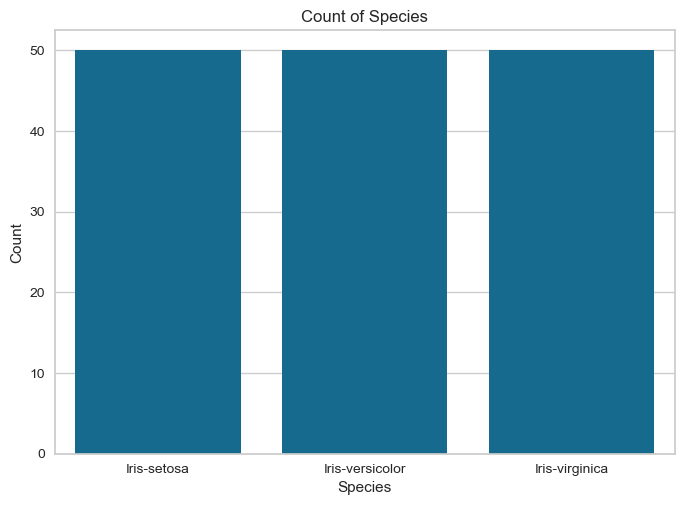

In [7]:
sns.countplot(data=data, x='Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Count of Species')
plt.show()

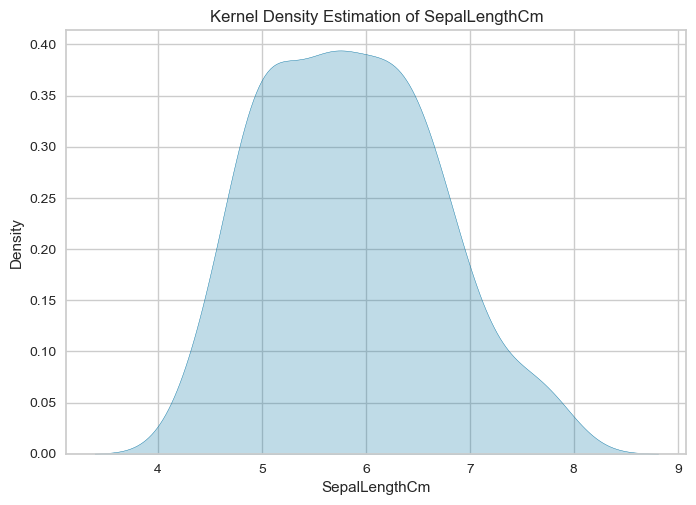

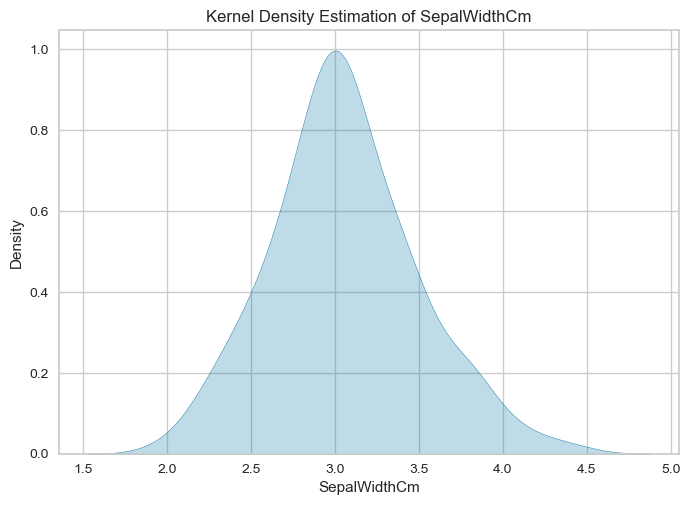

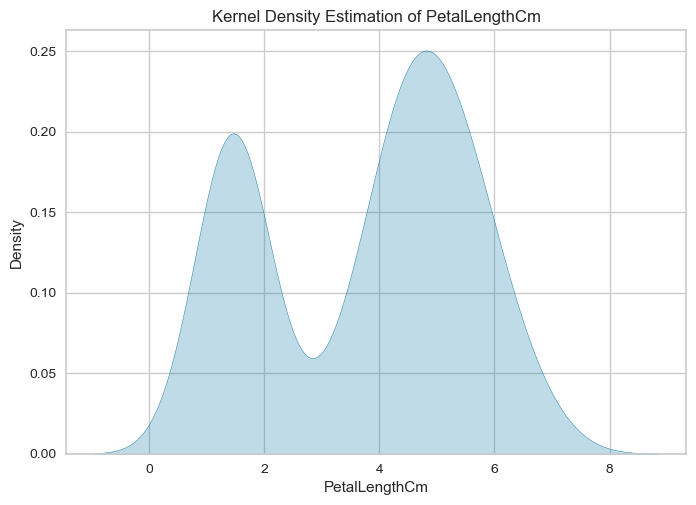

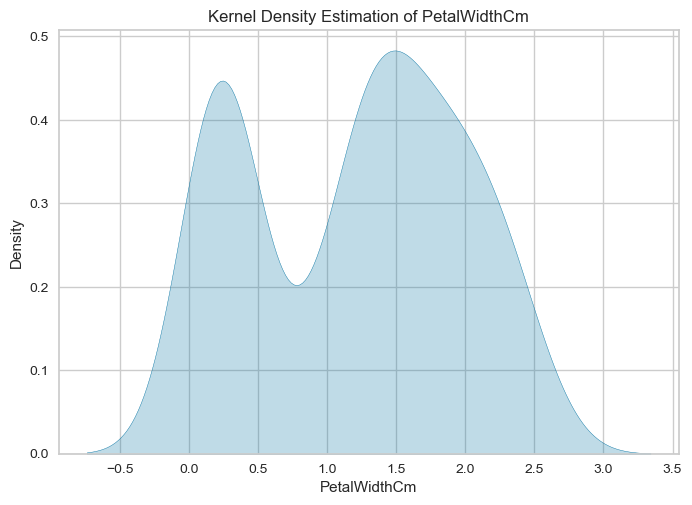

In [8]:
# Iterate over each feature column
for feature in data.columns[:-1]:  # Exclude the last column 'Species'
    sns.kdeplot(data=data, x=feature, fill=True)
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.title(f'Kernel Density Estimation of {feature}')
    plt.show()

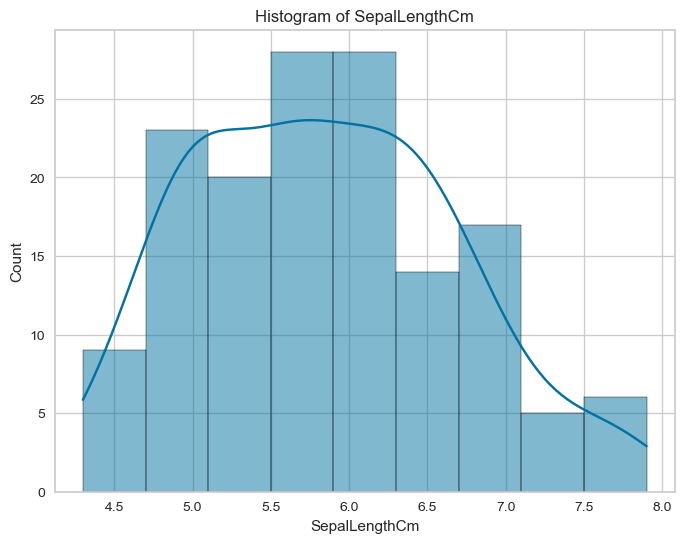

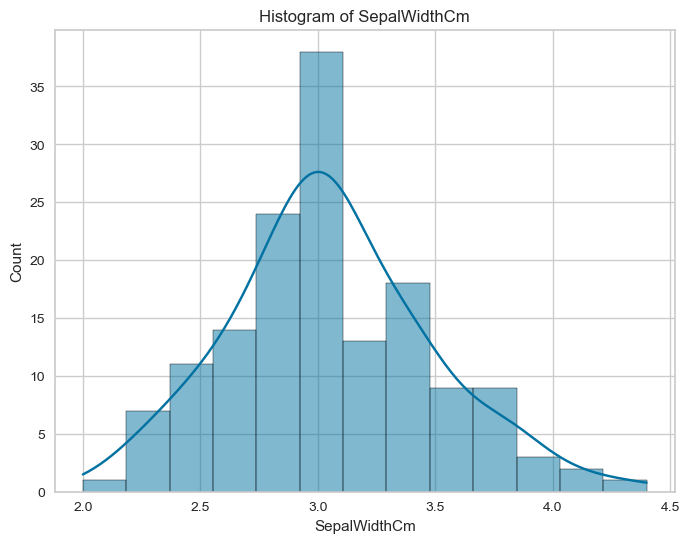

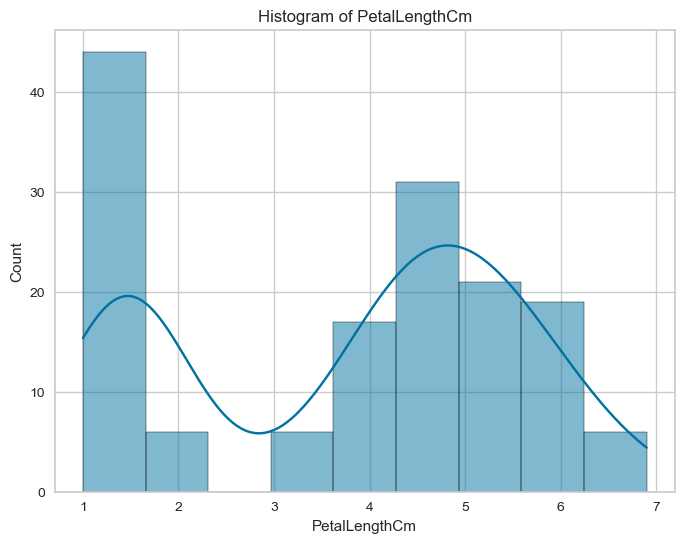

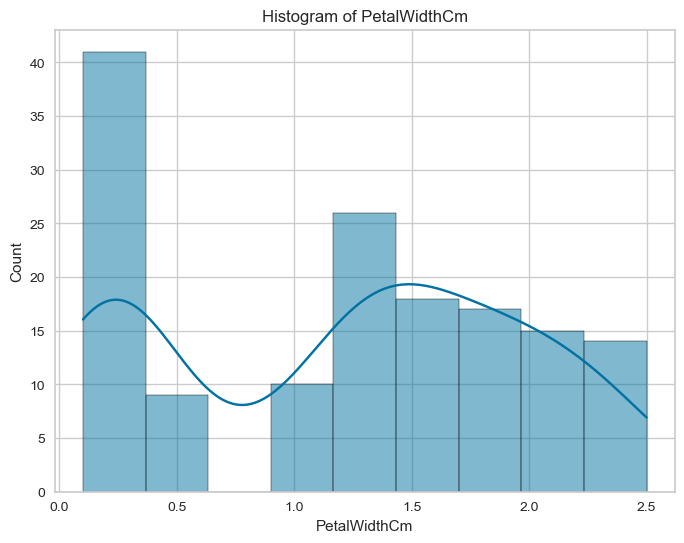

In [9]:
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

for feature in features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=data, x=feature, kde=True)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Histogram of {feature}')
    plt.show()

## Inteperet the  Results 

Let's analyze the univariate distributions of each feature in the Iris dataset.

1. `Petal Length`:

   - The histogram shows two distinct groups in the petal length data, which suggests that this feature might be a good indicator to differentiate between certain Iris species.
   - One group is centered around a petal length of 1-2 cm, and the other is more spread out, ranging from 3 to 7 cm. This could potentially indicate a difference between a certain Iris species with shorter petals and the other species with longer petals.

2. `Petal Width`:

   - Similar to petal length, petal width also shows two distinct groups. One group has a petal width of less than 1 cm, and the other ranges from 1 to 2.5 cm.
   - This feature could also be useful in differentiating between Iris species.

3. `Sepal Length`:

   - The sepal length data appears to follow a normal distribution, with most of the lengths centered around 5-6 cm.
   - There doesn't seem to be a clear separation or grouping in the sepal length data, which suggests that sepal length alone might not be a good feature to differentiate between the species.

4. `Sepal Width`:

   - The sepal width data also appears to follow a normal distribution, with most of the widths centered around 3 cm.
   - Like sepal length, sepal width also doesn't show clear separations or groups, suggesting that it might not be as useful for differentiating between the species as petal length or petal width.

Univariate analysis is a form of initial exploratory analysis to understand the distribution of each feature. It's an important step before moving on to more complex analyses and Models. It helps us understand the characteristics of each feature, identify potential outliers, and get a sense of the data's structure.
</div>

### 2. Bivariate Analysis

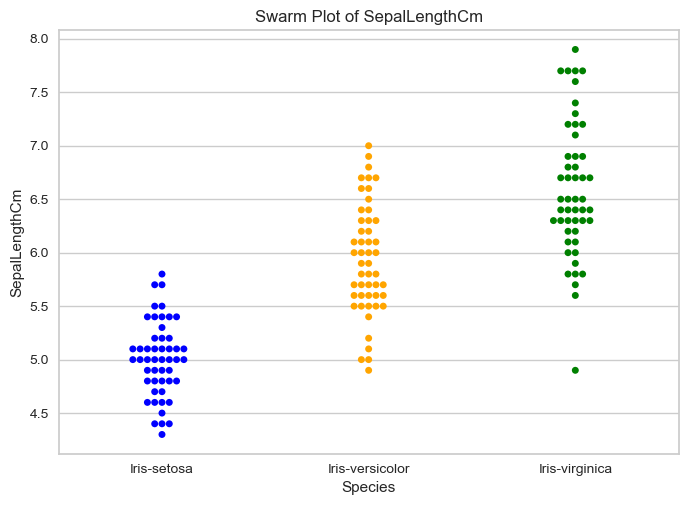

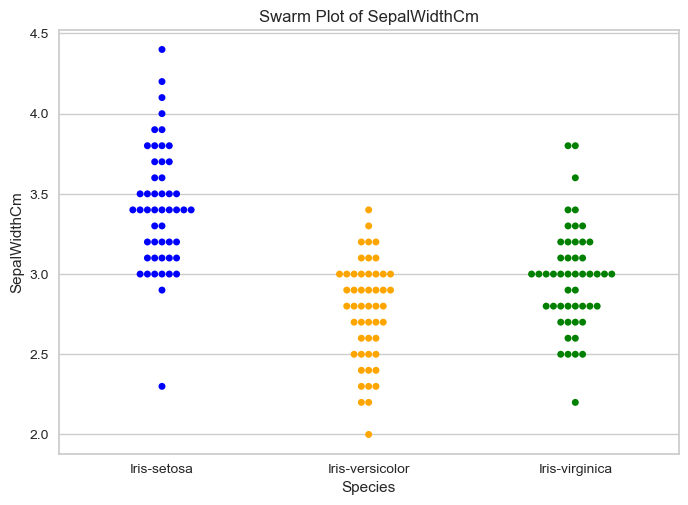

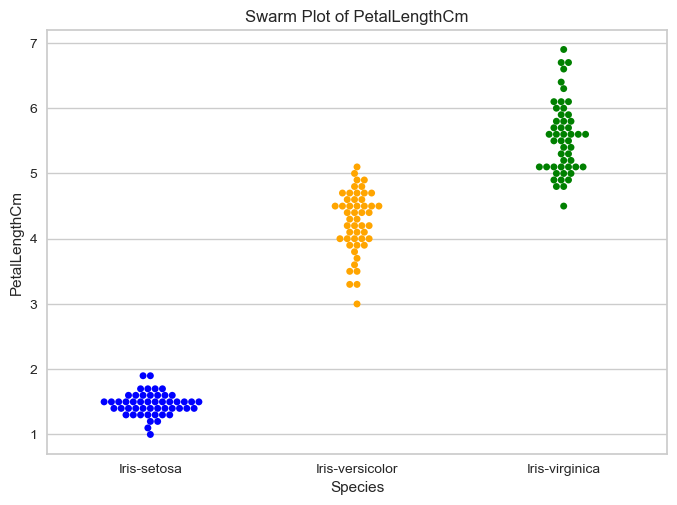

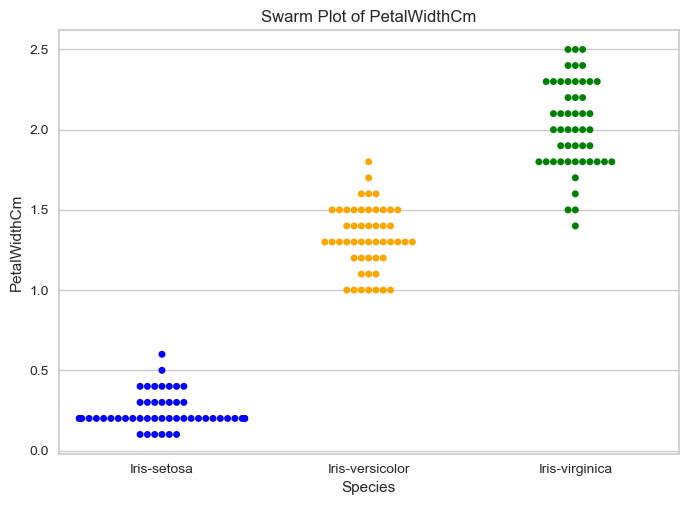

In [10]:
def swarm_plots(data):
    features = data.columns[:-1]  # Exclude the last column ('Species')

    species_colors = {'setosa': 'blue', 'versicolor': 'orange', 'virginica': 'green'}

    for feature in features:
        plt.figure()
        sns.swarmplot(data=data, x='Species', y=feature, palette=species_colors.values())
        plt.xlabel('Species')
        plt.ylabel(feature)
        plt.title(f'Swarm Plot of {feature}')
        plt.show()

# Call the function to generate swarm plots for each feature
swarm_plots(data)

## Inteperet the  Results 📈

Let's analyze the bivariate distributions of each feature in the Iris dataset.

1. **`Sepal Length`**:

   - The swarm plot shows the distribution of sepal length for each species. It's clear that the Setosa species tends to have shorter sepals compared to the other two species.
   - Versicolor and Virginica have more overlap in sepal length, but Virginica tends to have slightly longer sepals.

2. **`Sepal Width`**:

   - The Setosa species tends to have wider sepals compared to the other two species.
   - Versicolor and Virginica also have some overlap in sepal width, but Versicolor tends to have slightly narrower sepals.

3. **`Petal Length`**:

   - The petal length clearly differentiates the Setosa species from the other two. Setosa has significantly shorter petals.
   - Versicolor and Virginica also show some differentiation, with Virginica having longer petals.

4. **`Petal Width`**:

   - Similar to petal length, petal width also clearly differentiates the Setosa species, which has narrower petals.
   - Versicolor has intermediate petal width, and Virginica has the widest petals.

Bivariate analysis is a crucial step in exploratory data analysis as it allows us to understand the relationships between different pairs of variables. These plots suggest that petal measurements may be more useful features for differentiating between the species compared to sepal measurements in our Model.

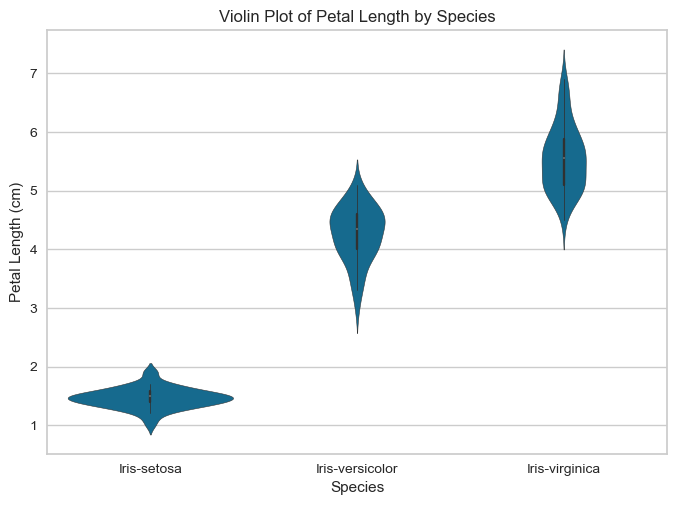

In [11]:
# you can use loop function like swarm plot on this violin plot too 
sns.violinplot(data=data, x='Species', y='PetalLengthCm')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.title('Violin Plot of Petal Length by Species')
plt.show()

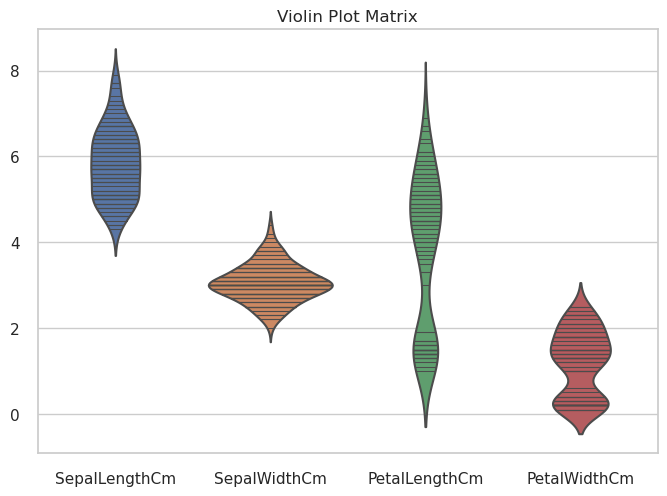

In [11]:
sns.set(style="whitegrid")
sns.violinplot(data=data, inner='stick')
plt.title('Violin Plot Matrix')
plt.show()

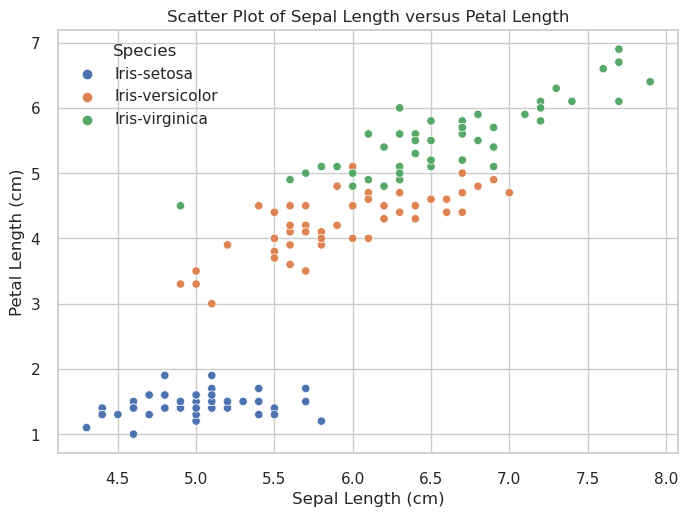

In [12]:
sns.scatterplot(data=data, x='SepalLengthCm', y='PetalLengthCm', hue='Species')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Scatter Plot of Sepal Length versus Petal Length')
plt.show()

### 3. Multivariate Analysis

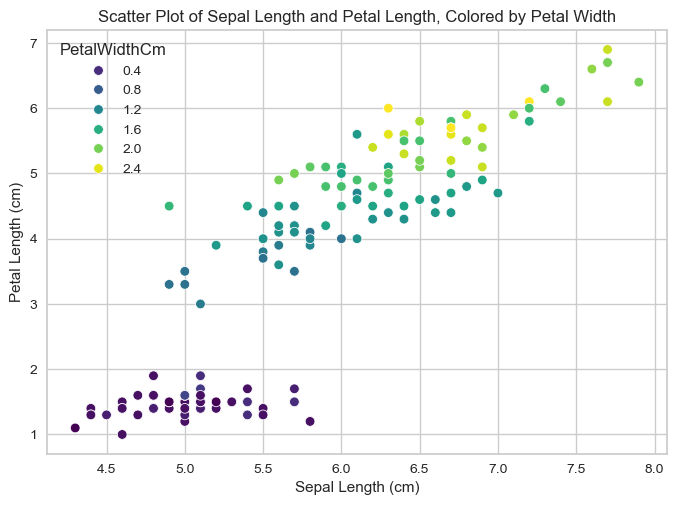

In [12]:
sns.scatterplot(data=data, x='SepalLengthCm', y='PetalLengthCm', hue='PetalWidthCm', palette='viridis')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Scatter Plot of Sepal Length and Petal Length, Colored by Petal Width')
plt.show()

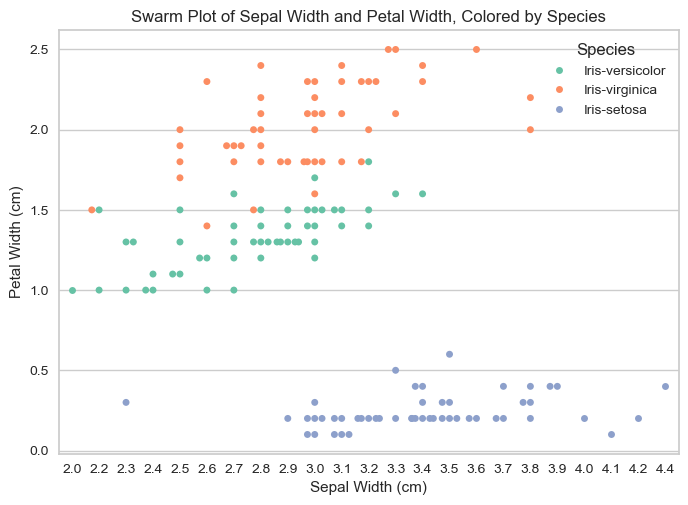

In [13]:
sns.swarmplot(data=data, x='SepalWidthCm', y='PetalWidthCm', hue='Species', palette='Set2')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Swarm Plot of Sepal Width and Petal Width, Colored by Species')
plt.show()

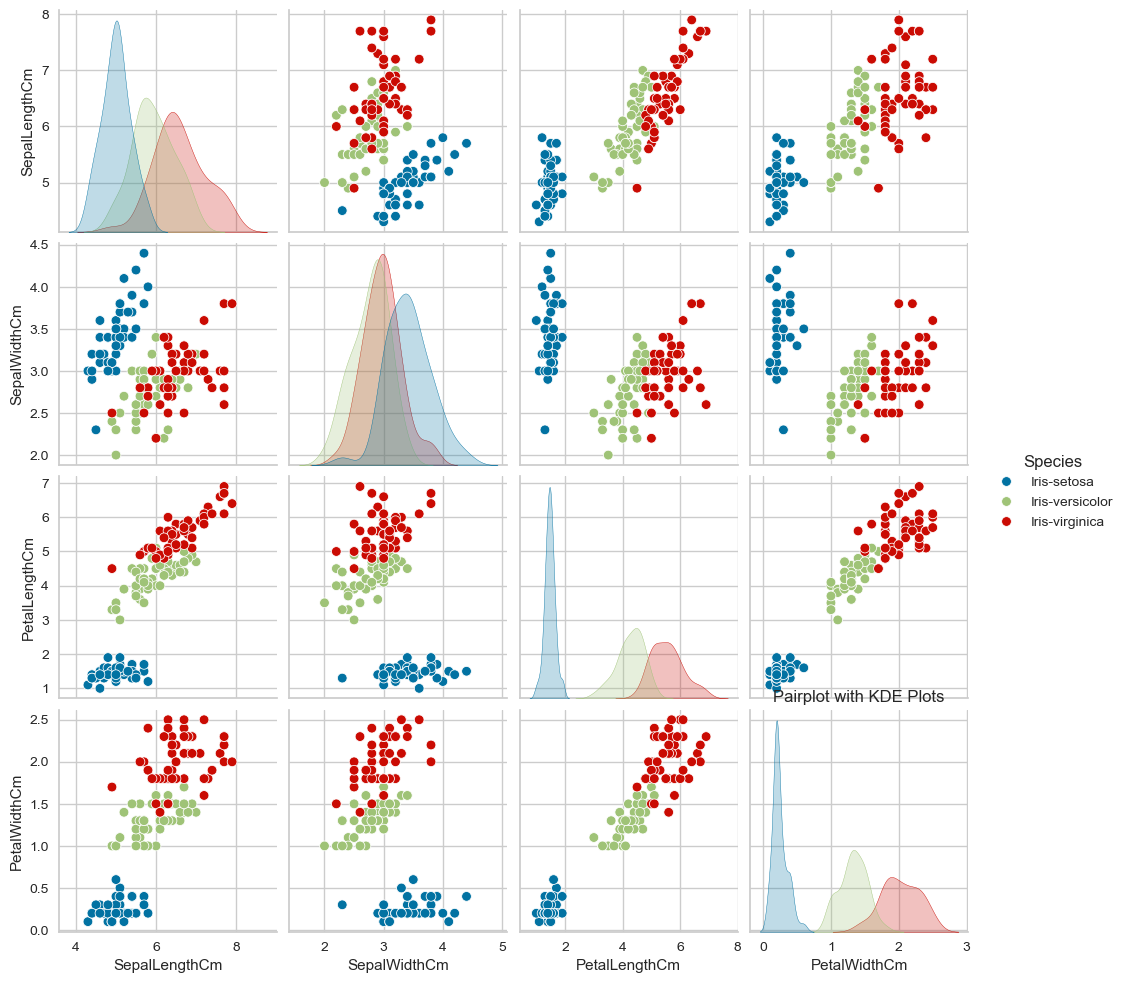

In [14]:
sns.pairplot(data=data, hue='Species', diag_kind='kde')
plt.title('Pairplot with KDE Plots')
plt.show()

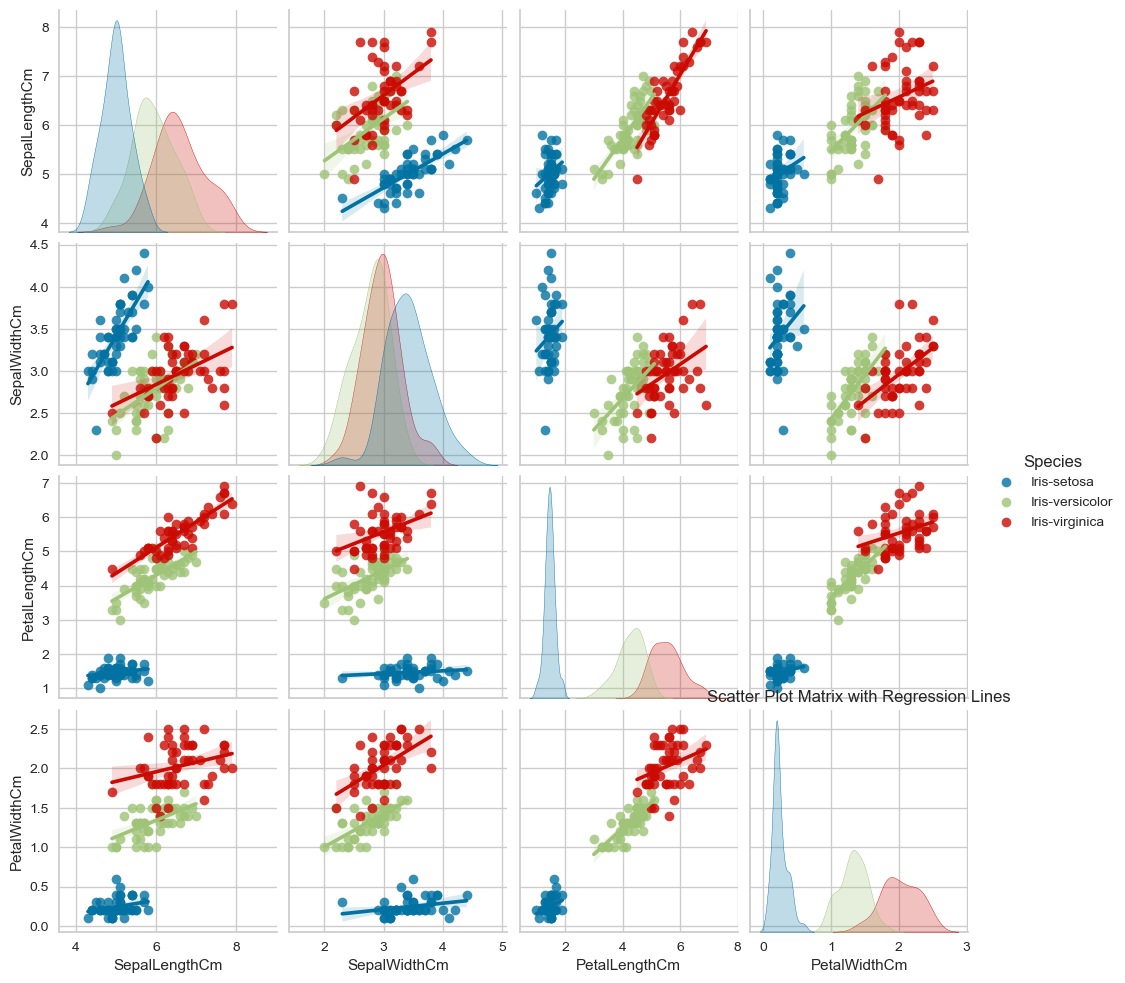

In [15]:
sns.pairplot(data=data, kind='reg', hue='Species')
plt.title('Scatter Plot Matrix with Regression Lines')
plt.show()

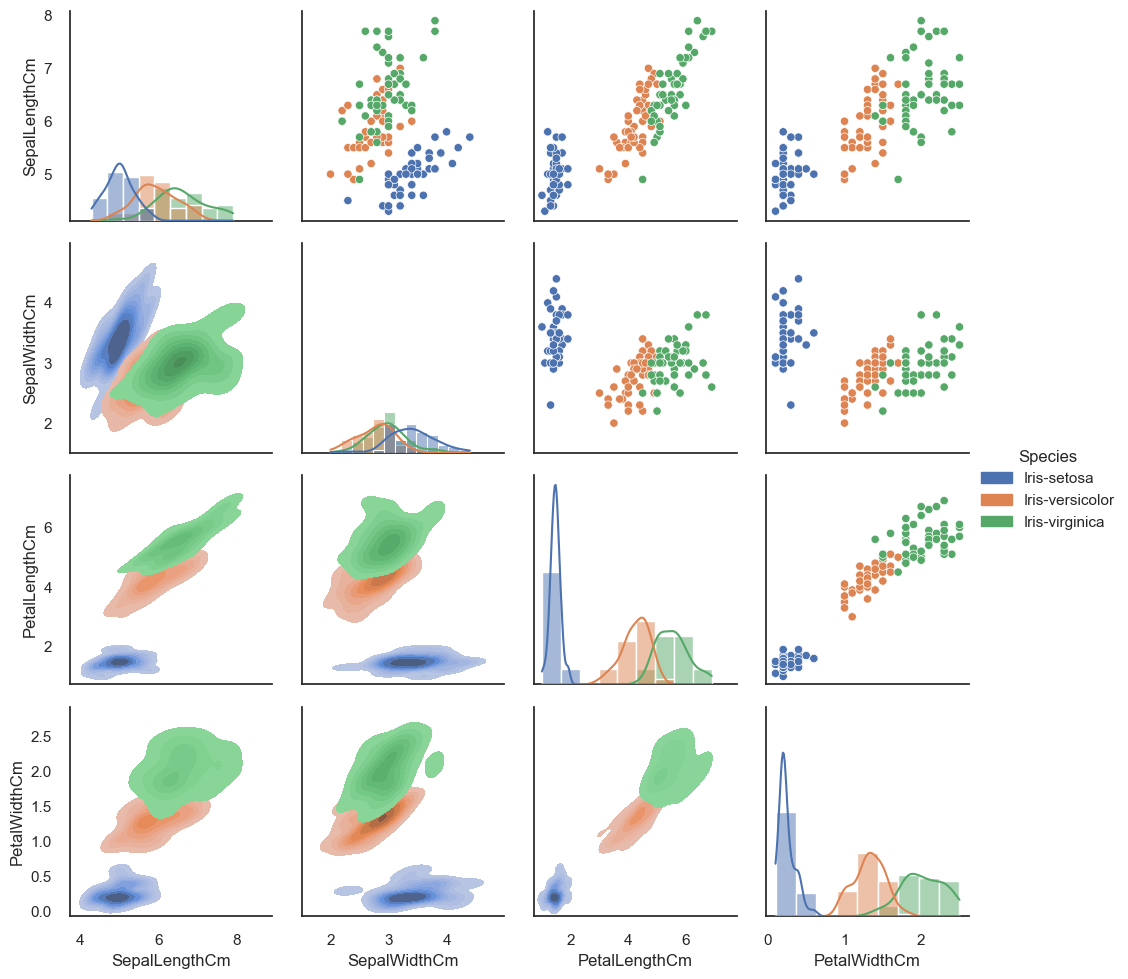

In [16]:
sns.set(style="white")
g = sns.PairGrid(data, hue="Species")
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)
g.add_legend()
plt.show()

## Inteperet the  Results 📈

1. `Sepal Length` vs. `Sepal Width`: There's some overlap between the species, but it's clear that Setosa generally has shorter and wider sepals compared to the other two species.

2. `Petal Length` vs.`Petal Width`: This pair of features clearly differentiates the species. Setosa has shorter and narrower petals, Versicolor has medium-length and medium-width petals, and Virginica has the longest and widest petals.

3. `Sepal Length` vs. `Petal Length` and `Sepal Length` vs. `Petal Width`: These plots show that Setosa has shorter sepals and petals, while Virginica has the longest sepals and petals. Versicolor falls in between.

4. `Sepal Width` vs. `Petal Length` and `Sepal Width` vs. `Petal Width`: These plots show that Setosa has wider sepals and shorter petals. On the other hand, Virginica has narrower sepals and longer petals. Versicolor falls in between.

Multivariate analysis is a crucial step in exploratory data analysis as it allows us to understand the relationships between different pairs of variables and how they collectively relate to the species of the Iris flower. These plots suggest that petal measurements may be more useful features for differentiating between the species compared to sepal measurements in our Model.

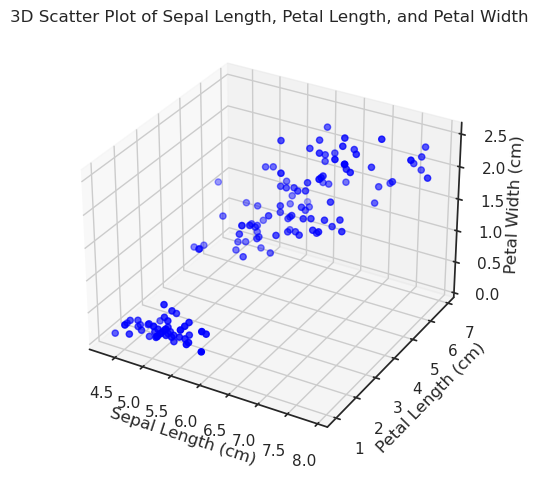

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['SepalLengthCm'], data['PetalLengthCm'], data['PetalWidthCm'], c='blue')
ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Petal Length (cm)')
ax.set_zlabel('Petal Width (cm)')
ax.set_title('3D Scatter Plot of Sepal Length, Petal Length, and Petal Width')
plt.show()


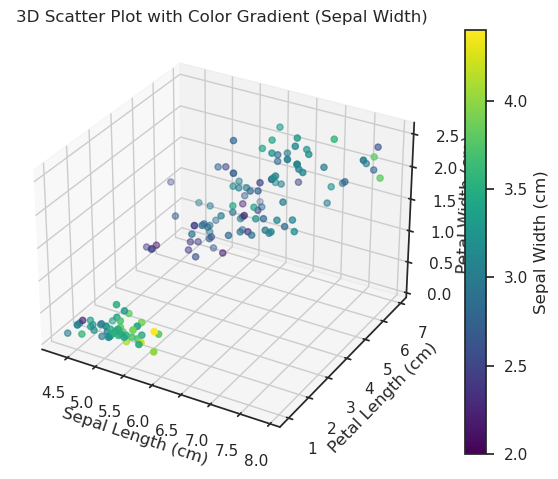

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(data['SepalLengthCm'], data['PetalLengthCm'], data['PetalWidthCm'], c=data['SepalWidthCm'], cmap='viridis')
ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Petal Length (cm)')
ax.set_zlabel('Petal Width (cm)')
ax.set_title('3D Scatter Plot with Color Gradient (Sepal Width)')
cbar = plt.colorbar(sc)
cbar.set_label('Sepal Width (cm)')
plt.show()

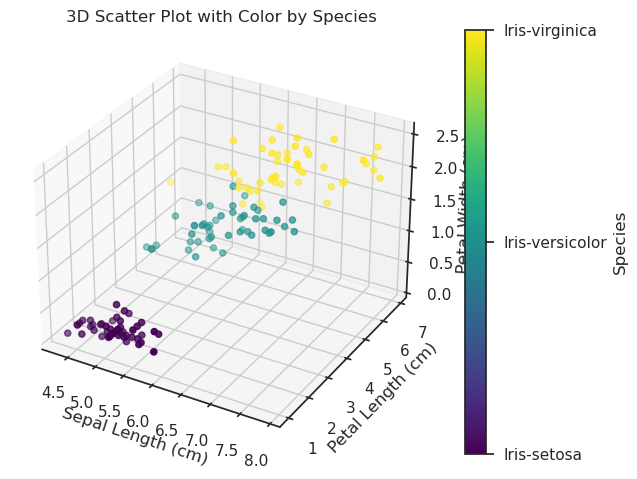

In [20]:
# Map species to numeric values
species_mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
data['SpeciesNumeric'] = data['Species'].map(species_mapping)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(data['SepalLengthCm'], data['PetalLengthCm'], data['PetalWidthCm'], c=data['SpeciesNumeric'], cmap='viridis')
ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Petal Length (cm)')
ax.set_zlabel('Petal Width (cm)')
ax.set_title('3D Scatter Plot with Color by Species')
cbar = plt.colorbar(sc)
cbar.set_ticks([0, 1, 2])
cbar.set_ticklabels(species_mapping.keys())
cbar.set_label('Species')
plt.show()


## Inteperet the  Results 📈

Here's what we can observe from this 3D scatter plot:

- The **`Iris-setosa`** species (blue points) is clearly separated from the other two species. This suggests that setosa has distinct feature measurements compared to versicolor and virginica, which aligns with our previous observations from the univariate, bivariate, and multivariate analyses.

- The **`Iris-versicolor`** and **`Iris-virginica`** species (yello and green points, respectively) show some overlap but also some degree of separation. This suggests that while these two species have similar feature measurements, there are still differences that can be used to distinguish between them.

This 3D scatter plot provides a comprehensive view of the relationships between the features and the species of the Iris flower. It suggests that a Model should be able to classify the species with a high degree of accuracy, especially for the setosa species. However, the model might have a harder time distinguishing between versicolor and virginica due to their overlap in feature space.

## CORRELATION MATRIX

### 1. Adjust columns

In [17]:
categorical_columns = ['Species']
numerical_columns = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
dummy_variables = pd.get_dummies(data, columns=categorical_columns, drop_first=False)

### 2.Preprocessing : Scaler
​
Preprocessing is a crucial step before training the model. In this case, numerical features are standardized (mean removed and scaled to unit variance), and categorical features are one-hot encoded. Standardization is not required for all models but is generally a good practice. One-hot encoding</span>** is necessary for categorical variables to be correctly understood by the Model.
​
The StandardScaler in sklearn is based on the assumption that the data, follows a distribution that might not necessarily be Gaussian (normal), but we still transform it in a way that its distribution will have a mean value 0 and standard deviation of 1.

In [18]:
scaler = StandardScaler()

# Scale the numerical columns
scaled_numerical = scaler.fit_transform(data[numerical_columns])

# Convert the scaled numerical columns
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_columns)

In [19]:
# Drop the original numerical columns
dummy_variables = dummy_variables.drop(numerical_columns, axis=1)

# Concatenate the dummy variables and scaled numerical columns
processed_df = pd.concat([dummy_variables, scaled_numerical_df], axis=1)

### 3.Correlation Matrix

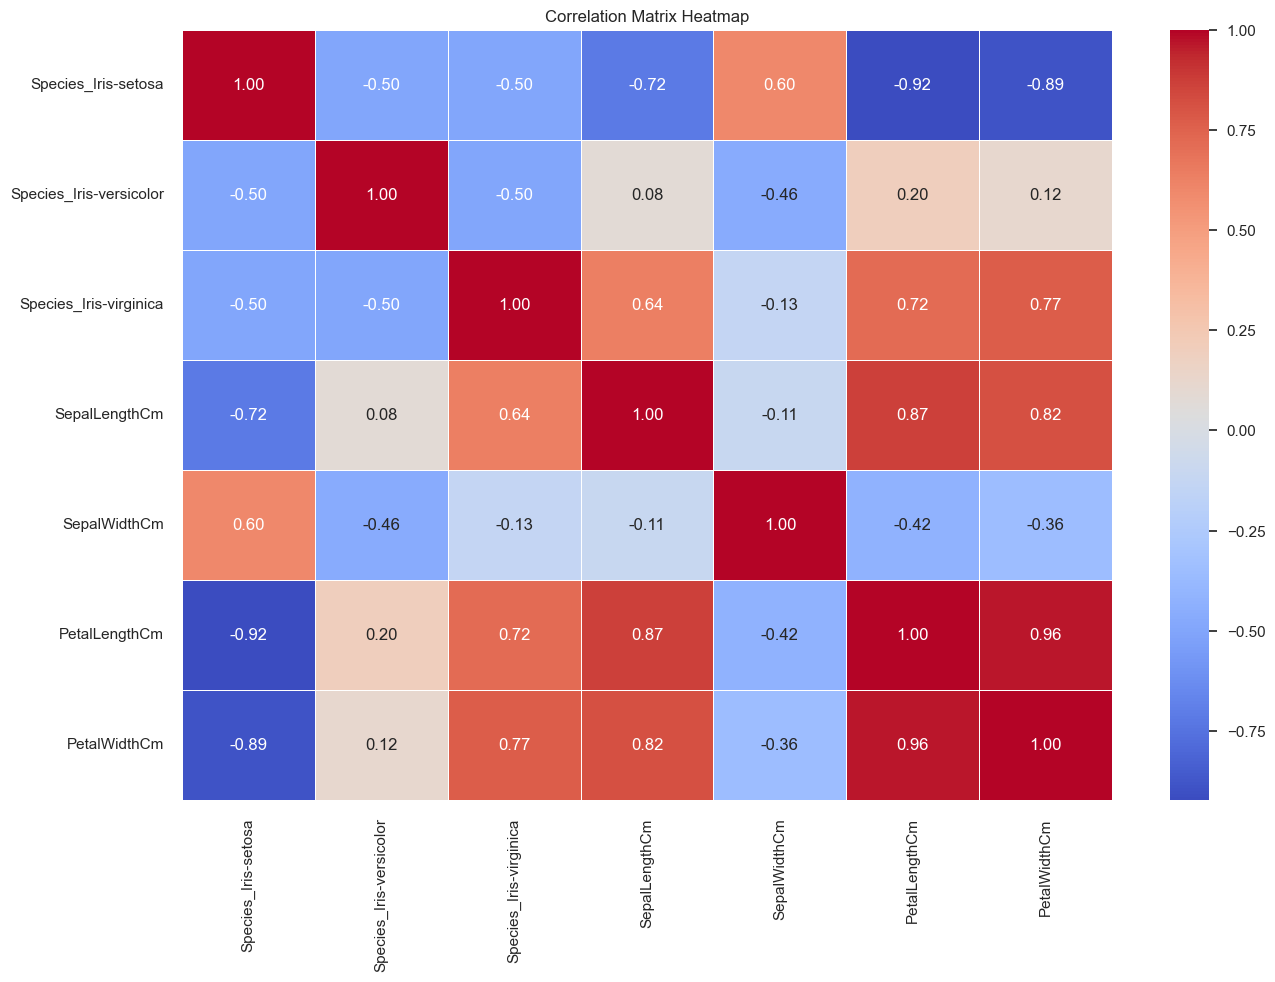

In [20]:
correlation_matrix = processed_df.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

 ## Correlation Matrix Interpretation:

This is a correlation matrix that provides the pairwise correlation of all columns in the dataframe. The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation. Here are some interpretations of your results:

- `Species_Iris-setosa` is strongly negatively correlated with `PetalLengthCm` and `PetalWidthCm` (-0.92 and -0.88 respectively). This means that as the petal length and width increase, it's less likely to be a setosa. 

- `Species_Iris-versicolor` has weak positive correlations with `PetalLengthCm` and `PetalWidthCm` (0.20 and 0.12 respectively), meaning these dimensions do not contribute significantly to being a versicolor. 

- `Species_Iris-virginica` has fairly strong positive correlations with `PetalLengthCm` and `PetalWidthCm` (0.72 and 0.77 respectively). This suggests that as petal length and width increase, it's more likely to be a virginica. 

- `SepalLengthCm` has strong positive correlations with `PetalLengthCm` and `PetalWidthCm` (0.87 and 0.81 respectively). This implies that as sepal length increases, petal length and width also tend to increase. 

- `SepalWidthCm` is negatively correlated with `PetalLengthCm` and `PetalWidthCm` (-0.42 and -0.35 respectively), suggesting that as the sepal width increases, the petal length and width tend to decrease, but this correlation is not very strong. 

- `PetalLengthCm` and `PetalWidthCm` are very strongly correlated (0.96), implying that petal length and width tend to increase together. 

> Remember that correlation does not imply causation. This analysis only shows the relationship between two variables but does not necessarily mean that one causes the other to change. For example, just because petal length and width are correlated does not mean increasing the petal length causes the width to increase. There could be a third factor influencing both.

This correlation matrix provides a comprehensive view of the relationships between the features and the species of the Iris flower. It suggests that petal measurements may be more useful features for differentiating between the species compared to sepal measurements in our Model. However, the strong correlation between the petal measurements might lead to multicollinearity if they are both included in the model.

## CLUSTERING ANALYSIS

### 1. Elbow Plot

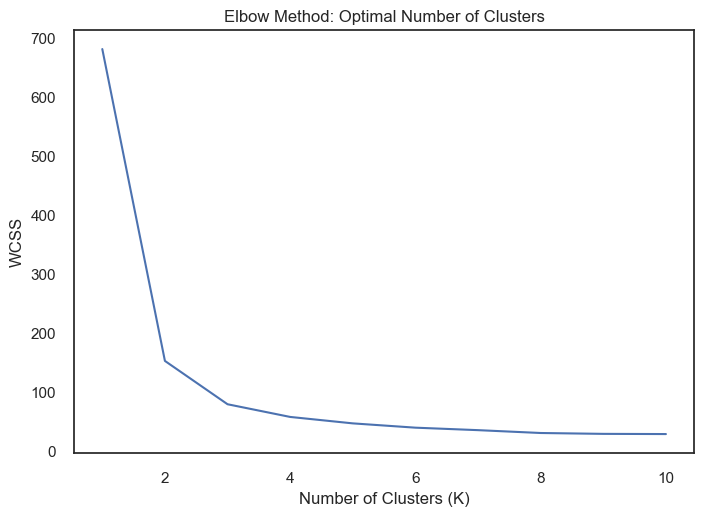

In [21]:
# Prepare the feature matrix by selecting the numerical features from the dataset
X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

# Determine the optimal number of clusters using the elbow method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the within-cluster sum of squares (WCSS) against the number of clusters (K)
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method: Optimal Number of Clusters')
plt.show()

## Inteperet the  Results 
The WCSS decreases as the number of clusters increases. This is expected because when the number of clusters increases, each point becomes closer to the centroid of its cluster, and therefore, the sum of squares decreases.

The rate of decrease of WCSS is steep until around 2 clusters, after which the rate of decrease significantly slows down. This point, where the rate of decrease changes most significantly, is known as the "elbow", and it's typically considered as the optimal number of clusters.

In this case, the elbow plot suggests that the optimal number of clusters for the Iris dataset is around 2. However, we know that there are actually 3 species of Iris flowers in the dataset. This discrepancy might be due to the overlap between the Versicolor and Virginica species that we observed in the previous analyses. It's a reminder that while the elbow method is a useful heuristic, it doesn't always identify the true number of clusters, especially when there's overlap between the clusters.

### K-Means Clustering

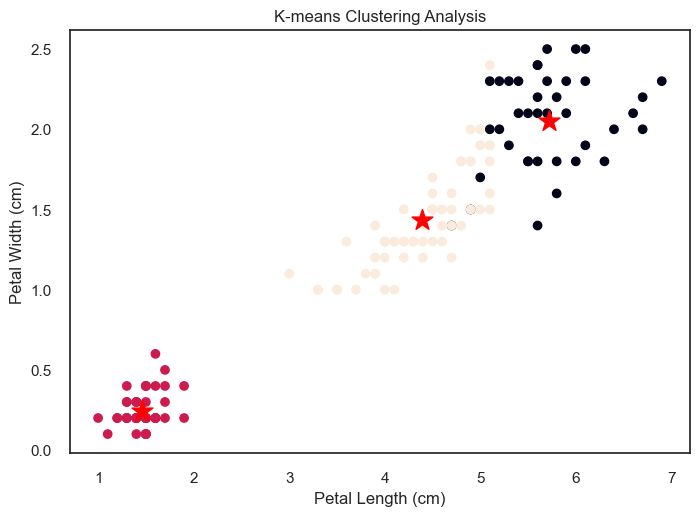

In [31]:
# Choose the optimal number of clusters based on the elbow plot
k = 3

# Create an instance of the KMeans model
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the model to the data
kmeans.fit(X)

# Get the cluster labels assigned to each data point
labels = kmeans.labels_

# Retrieve the cluster centers (centroids)
centroids = kmeans.cluster_centers_

# Visualize the clusters by creating a scatter plot of two features, colored by the cluster labels
plt.scatter(X['PetalLengthCm'], X['PetalWidthCm'], c=labels)
plt.scatter(centroids[:, 2], centroids[:, 3], marker='*', color='red', s=250)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('K-means Clustering Analysis')
plt.show()

## Inteperet the  Results 

The algorithm has grouped the data into three clusters, which aligns with the three species of Iris flowers in the dataset.

1. The cluster at the bottom left, which likely corresponds to the Setosa species, is well-separated from the other two clusters. This aligns with our previous observations that Setosa has distinct petal measurements compared to the other two species.

2. The other two clusters, which likely correspond to the Versicolor and Virginica species, show some overlap. This also aligns with our previous observations that these two species have similar petal measurements.

This K-means clustering analysis provides a visual representation of how the Iris data can be grouped based on the petal measurements. It suggests that a Model should be able to classify the species with a high degree of accuracy, especially for the Setosa species. However, the model might have a harder time distinguishing between Versicolor and Virginica due to their overlap in feature space.


# EDA RESULT
## Results 

1. Descriptive Statistics : The descriptive statistics provided a summary of the central tendency, dispersion, and shape of the dataset’s distribution. We observed that the features have different ranges, which might require scaling before applying machine learning algorithms. However, LDA, being a distance-based method, is quite robust to the scale of the data.

2. Univariate Analysis : The histograms showed that petal length and petal width might be good features to differentiate between the species, especially Setosa which has distinctly smaller petal length and width.

3. Bivariate Analysis : The swarm plots showed that Setosa is quite distinct from the other two species in terms of all four features. Versicolor and Virginica show some overlap, suggesting that these two species are more similar to each other than to Setosa.

4. Multivariate Analysis : The pair plot and the 3D scatter plot showed that the combination of petal length and petal width can clearly differentiate Setosa from the other two species. However, Versicolor and Virginica still show some overlap.

5. Correlation Matrix : The correlation matrix showed that petal length and petal width have a very strong positive correlation. This suggests that these two features carry similar information, and including both in a machine learning model might lead to multicollinearity.

6. K-means Clustering : The K-means clustering analysis showed that the data can be grouped into three clusters, which aligns with the three species of Iris flowers in the dataset. However, there's some overlap between the Versicolor and Virginica clusters.

## Discussion

Given these observations, Linear Discriminant Analysis (LDA) seems to be a suitable method for this dataset. LDA is a dimensionality reduction technique that is commonly used for multiclass classification problems. It works by projecting the features onto a lower-dimensional space with good class-separability in order to avoid overfitting and reduce computational costs.

**LDA is particularly suitable for this dataset for the following reasons:**

1. Multiclass Classification: The Iris dataset is a multiclass classification problem, as there are three species to predict. LDA is designed to handle multiclass problems.

2. Assumptions: LDA assumes that the observations are drawn from a multivariate Gaussian distribution, and the scatter plots suggest that this assumption is reasonable for this dataset.

3. Collinearity: LDA can handle multicollinearity, which might be an issue in this dataset given the strong correlation between petal length and petal width.

4. Dimensionality Reduction: LDA will combine the four features into a smaller set of new features (linear discriminants) that maximizes the separation between the classes. This can help to visualize the separation between the classes and might improve the performance of the classification model.

## Preprocessing data

In [32]:
# Load data
df = pd.read_csv('Iris.csv')

In [33]:
# Preprocessing
encoder = LabelEncoder()
df['Species'] = encoder.fit_transform(df['Species'])

In [34]:
# Split data into features (X) and target (y)
X = df.drop(columns=['Id', 'Species'])
y = df['Species']

In [35]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Hyperparameter Tuning

In [36]:
# Hyperparameter tuning
param_grid = {'solver': ['svd', 'lsqr', 'eigen'],
              'tol': [0.0001, 0.0002, 0.0003]}

lda = LinearDiscriminantAnalysis()

grid_search = GridSearchCV(estimator=lda, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'solver': 'svd', 'tol': 0.0001}


## Hyperparameter Tuning Results 

We have performed hyperparameter tuning on our Linear Discriminant Analysis (LDA) model. 

There are two key hyperparameters in this case:

1. Solver: It refers to the algorithm used for computation. In our case, the best parameter found was 'svd', which stands for Singular Value Decomposition. It's typically recommended for large-scale data as it doesn't require any parameter settings and avoids calculating the covariance matrix. 

2. Tol: It is the tolerance for stopping criteria. It is the threshold below which the algorithm will not converge. Our best parameter found was 0.0001, which means the algorithm will stop its iterations when the error between two iterations is less than 0.0001.
   
Our hyperparameter tuning results indicated that the best performance of the LDA model was achieved when the solver was set to 'svd' and tolerance ('tol') was set to 0.0001.

This implies that these hyperparameter settings worked the best for our specific data and model configuration. 

## Predictive Model

In [37]:
# Fit the model with best parameters
lda = LinearDiscriminantAnalysis(solver=grid_search.best_params_['solver'], tol=grid_search.best_params_['tol'])
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

## Model evaluation

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



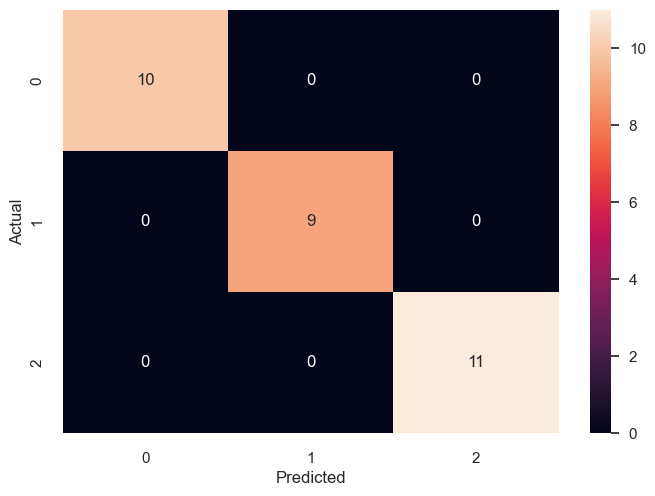

In [38]:
# Make predictions
y_pred = lda.predict(X_test)

# Model evaluation
print(classification_report(y_test, y_pred))
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=lda.classes_, yticklabels=lda.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

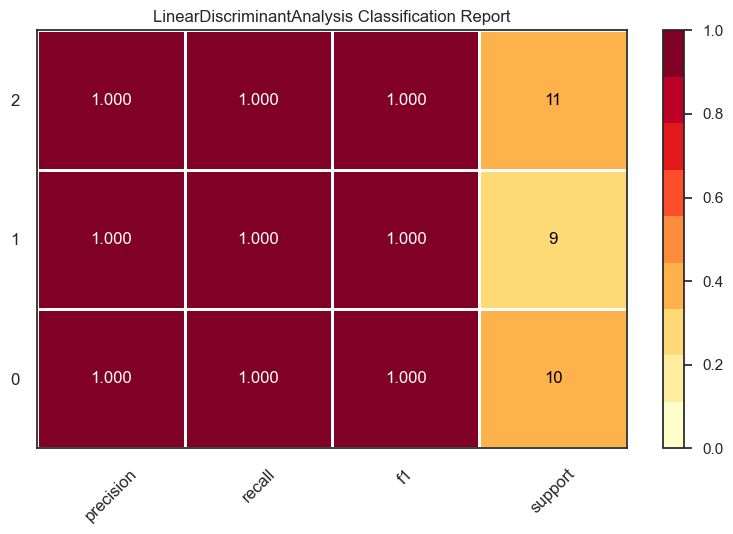

<Axes: title={'center': 'LinearDiscriminantAnalysis Classification Report'}>

In [39]:
# Visualizing with Classification Report
visualizer = ClassificationReport(lda, support=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

### Results 

From the classification report, which provides key metrics in a machine learning classification problem. Here's what each metric means:

- Precision: This is the ratio of correctly predicted positive observations to the total predicted positives. High precision relates to the low false positive rate.

- Recall (Sensitivity): This is the ratio of correctly predicted positive observations to the all observations in actual class. High recall relates to the low false negative rate.

- F1 score: This is the weighted average of Precision and Recall. It tries to find the balance between precision and recall.

- Support: This is the number of samples of the true response that lie in that class.

Observation from this classification report:

1. The model achieved a precision, recall, and F1-score of 1.00 for all three classes. This means that the model was able to perfectly classify all the samples in the test set, with no false positives or false negatives.

2. The overall accuracy of the model on the test set is also 1.00, which means that the model correctly classified 100% of the samples.

3. The macro average and weighted average of the precision, recall, and F1-score are also 1.00, which further confirms the excellent performance of the model.

## Feature importance

In [42]:
# Feature importance
importance = lda.coef_
for i, j in enumerate(importance):
    print('Class %d: %s' % ((i+1), j))

Class 1: [  5.6329093   14.78025075 -17.95274031 -19.82806589]
Class 2: [-1.31638676 -5.17819724  5.00477139  3.53283552]
Class 3: [-4.39344909 -9.71548571 13.15164065 16.62247126]


### Results

The information we got is the coefficients of the Linear Discriminant Analysis (LDA) model for each class, which can be interpreted as the feature importance in the context of LDA. Here's what each coefficient means:

- A positive coefficient increases the log-odds of the response (and thus increases the probability), and a negative coefficient decreases the log-odds of the response (and thus decreases the probability).

- The magnitude of the coefficient indicates the strength of the relationship between the feature and the response. The larger the absolute value of the coefficient, the stronger the relationship.

Observations
1. Class 1 (Setosa): The model places a strong negative weight on PetalLengthCm and PetalWidthCm, and a positive weight on SepalLengthCm and SepalWidthCm. This suggests that shorter and narrower petals, and longer and wider sepals are important features for identifying Setosa.


2. Class 2 (Versicolor): The model places a negative weight on SepalLengthCm and SepalWidthCm, and a positive weight on PetalLengthCm and PetalWidthCm. This suggests that longer and wider sepals, and shorter and narrower petals are important features for identifying Versicolor.


3. Class 3 (Virginica): The model places a strong positive weight on PetalLengthCm and PetalWidthCm, and a negative weight on SepalLengthCm and SepalWidthCm. This suggests that longer and wider petals, and shorter and narrower sepals are important features for identifying Virginica.


These feature importances provide insights into the relationships between the features and the species of the Iris flower. They suggest that petal measurements are more important for differentiating between the species compared to sepal measurements in our model. However, it's always a good idea to use these feature importances in conjunction with other metrics and plots to get a comprehensive understanding of the model's performance.

## PCA

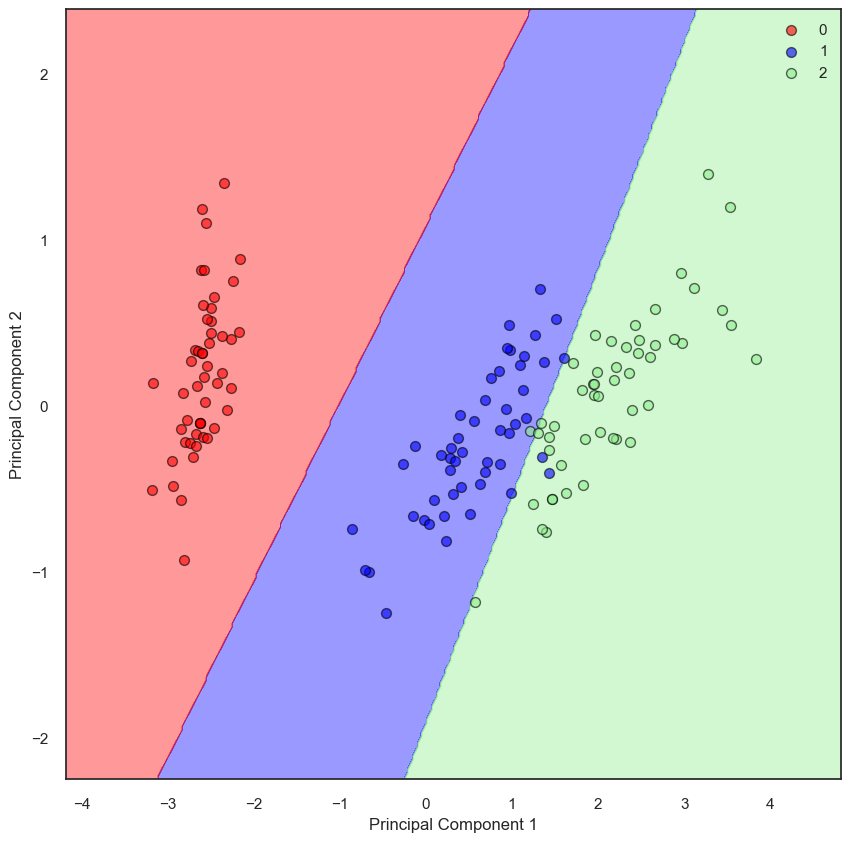

In [43]:
# Use PCA for dimensionality reduction
pca = PCA(n_components=2)
X_train2 = pca.fit_transform(X_train)
X_test2 = pca.transform(X_test)

# Train LDA on the reduced dataset
lda2 = LinearDiscriminantAnalysis()
lda2.fit(X_train2, y_train)

# Plotting decision regions
X_combined_std = np.vstack((X_train2, X_test2))
y_combined = np.hstack((y_train, y_test))

colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:len(np.unique(y_test))])

plt.figure(figsize=(10, 10))

#x1_min, x1_max = x_combined_std[:. 2].max()

x1_min, x1_max = X_combined_std[:, 0].min() - 1, X_combined_std[:, 0].max() + 1
x2_min, x2_max = X_combined_std[:, 1].min() - 1, X_combined_std[:, 1].max() + 1

xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                       np.arange(x2_min, x2_max, 0.02))

Z = lda2.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)

plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

for idx, cl in enumerate(np.unique(y_combined)):
    plt.scatter(x=X_combined_std[y_combined==cl, 0], 
                y=X_combined_std[y_combined==cl, 1],
                alpha=0.6, 
                color=cmap(idx),
                edgecolor='black',
                marker='o', 
                s=50,
                label=cl)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='upper right')
plt.show()

### Results 
The dataset was reduced to two dimensions using Principal Component Analysis (PCA), which is a dimensionality reduction technique that transforms the data to a new coordinate system such that the greatest variance by some projection of the data comes to lie on the first coordinate (called the first principal component), the second greatest variance on the second coordinate, and so on.

Observations

1. The plot shows the decision boundaries between the three classes (Setosa, Versicolor, and Virginica) in the space of the first two principal components.

2. The different colors represent different regions where the model will predict a particular class. For example, any new observation that falls in the red region will be predicted as Setosa, in the blue region as Versicolor, and in the green region as Virginica.

3. The model seems to separate the three classes quite well. The Setosa class is clearly separated from the other two classes, while there's a small overlap between the Versicolor and Virginica classes.

4. The scatter points represent the observations in the training set and the test set. We can see that most of the observations are correctly classified, as they fall in the region corresponding to their actual class.

While this decision region plot provides a nice visualization of the model's decision boundaries, it's important to remember that it's based on a reduced version of the dataset with only two features (the first two principal components). The actual decision boundaries in the space of the original features might be more complex. Also, the decision region plot should be used in conjunction with other metrics and plots to get a comprehensive understanding of the model's performance.

# SUMMARY

##  Results


1. Model Evaluation: The Linear Discriminant Analysis (LDA) model performed exceptionally well on the Iris dataset, achieving an accuracy of 100% on the test set. The model's precision, recall, and F1-score were all 1.00 for all three classes, indicating that the model was able to perfectly classify all the samples in the test set, with no false positives or false negatives. 

2. Feature Importance: The LDA model placed different weights on the features for each class. For example, petal measurements were more important for differentiating between the species compared to sepal measurements.

# Statsmodels

In [45]:
# Load data
data = pd.read_csv('Iris.csv')

data  = data.drop('Id',axis=1)


In [46]:
# Split data into features (X) and target (y)
X = df.drop(columns=['Id', 'Species'])
y = df['Species']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
# Add a constant term for the intercept
X_train_const = sm.add_constant(X_train_scaled)
X_test_const = sm.add_constant(X_test_scaled)

In [49]:
# Fit an OLS model (as a placeholder for LDA)
model = sm.OLS(y_train, X_train_const).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Species   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     357.2
Date:                Sat, 13 Jul 2024   Prob (F-statistic):           7.63e-64
Time:                        10:00:41   Log-Likelihood:                 10.635
No. Observations:                 120   AIC:                            -11.27
Df Residuals:                     115   BIC:                             2.668
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9917      0.021     48.022      0.000       0.951       1.033
x1            -0.0933      0.055     -1.704      0.091      -0.202       0.015
x2            -0.0287      0.031     -0.940      0.349      -0.089       0.032
x3             0.4405      0.119      3.695      0.000       0.204       0.677
x4             0.4122      0.085      4.862      0.000       0.244       0.580
==============================================================================
Omnibus:                        0.469   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.791   Jarque-Bera (JB):                0.339
Skew:                          -0.130   Prob(JB):                        0.844
Kurtosis:                       3.004   Cond. No.                         12.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
# Make predictions
y_train_pred_statsmodels = model.predict(X_train_const)
y_test_pred_statsmodels = model.predict(X_test_const)
y_train_pred_statsmodels = np.round(y_train_pred_statsmodels).astype(int)
y_test_pred_statsmodels = np.round(y_test_pred_statsmodels).astype(int)

In [55]:
# Calculate accuracy for statsmodels LDA
train_accuracy_statsmodels = accuracy_score(y_train, y_train_pred_statsmodels)
test_accuracy_statsmodels = accuracy_score(y_test, y_test_pred_statsmodels)
train_precision_statsmodels = precision_score(y_train, y_train_pred_statsmodels, average='weighted')
test_precision_statsmodels = precision_score(y_test, y_test_pred_statsmodels, average='weighted')
train_recall_statsmodels = recall_score(y_train, y_train_pred_statsmodels, average='weighted')
test_recall_statsmodels = recall_score(y_test, y_test_pred_statsmodels, average='weighted')

print(f"Train Statsmodels LDA Accuracy: {train_accuracy_statsmodels:.4f}")
print(f"Test Statsmodels LDA Accuracy: {test_accuracy_statsmodels:.4f}")
print(f"Train Statsmodels LDA Precision: {train_precision_statsmodels:.4f}")
print(f"Test Statsmodels LDA Precision: {test_precision_statsmodels:.4f}")
print(f"Train Statsmodels LDA Recall: {train_recall_statsmodels:.4f}")
print(f"Test Statsmodels LDA Recall: {test_recall_statsmodels:.4f}")

Train Statsmodels LDA Accuracy: 0.9750
Test Statsmodels LDA Accuracy: 1.0000
Train Statsmodels LDA Precision: 0.9752
Test Statsmodels LDA Precision: 1.0000
Train Statsmodels LDA Recall: 0.9750
Test Statsmodels LDA Recall: 1.0000


## **The provided metrics show the performance of the Linear Discriminant Analysis (LDA) model implemented using Statsmodels on both the training and testing datasets. Here is an interpretation of these results:**

### Train Set Metrics

- **Train Statsmodels LDA Accuracy: 0.9750**
  - The model correctly classified 97.50% of the training data instances.
  
- **Train Statsmodels LDA Precision: 0.9752**
  - The precision of 97.52% indicates that when the model predicted a certain class, 97.52% of those predictions were correct.

- **Train Statsmodels LDA Recall: 0.9750**
  - The recall of 97.50% indicates that the model correctly identified 97.50% of the actual positive instances in the training data.

### Test Set Metrics

- **Test Statsmodels LDA Accuracy: 1.0000**
  - The model achieved perfect accuracy on the test set, correctly classifying 100% of the test data instances.
  
- **Test Statsmodels LDA Precision: 1.0000**
  - The precision of 100% indicates that every instance predicted to belong to a class by the model was correctly classified.
  
- **Test Statsmodels LDA Recall: 1.0000**
  - The recall of 100% means that the model correctly identified all actual positive instances in the test data.

### Interpretation

- **High Training Accuracy, Precision, and Recall:** The training metrics are very high, indicating that the model performs extremely well on the training data. This suggests that the model has learned the patterns in the training data effectively.

- **Perfect Test Metrics:** The perfect accuracy, precision, and recall on the test set are unusual and could suggest several possibilities:
  - **Excellent Generalization:** The model generalizes extremely well to the test set, capturing the underlying data distribution perfectly.
  - **Potential Overfitting:** Although less likely given the perfect test results, if the test set is small or not representative, it might be coincidental that the model performs perfectly.
  - **Simple Dataset:** If the dataset has a clear, easily separable structure, achieving perfect performance might be feasible.

# logistic Regression

In [63]:
lda_sklearn = LinearDiscriminantAnalysis()
lda_sklearn.fit(X_train_scaled, y_train)

LinearDiscriminantAnalysis()

In [65]:
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
logistic_y_train_pred = lda_sklearn.predict(X_train_scaled)
logistic_y_test_pred = lda_sklearn.predict(X_test_scaled)

In [66]:
# Calculate accuracy for logistic regression
train_accuracy_logistic = accuracy_score(y_train, logistic_y_train_pred)
test_accuracy_logistic = accuracy_score(y_test, logistic_y_test_pred)
train_precision_logistic = precision_score(y_train, logistic_y_train_pred, average='weighted')
test_precision_logistic = precision_score(y_test, logistic_y_test_pred, average='weighted')
train_recall_logistic = recall_score(y_train, logistic_y_train_pred, average='weighted')
test_recall_logistic = recall_score(y_test, logistic_y_test_pred, average='weighted')

print(f"Train Logistic Regression Accuracy: {train_accuracy_logistic:.4f}")
print(f"Test Logistic Regression Accuracy: {test_accuracy_logistic:.4f}")
print(f"Train Logistic Regression Precision: {train_precision_logistic:.4f}")
print(f"Test Logistic Regression Precision: {test_precision_logistic:.4f}")
print(f"Train Logistic Regression Recall: {train_recall_logistic:.4f}")
print(f"Test Logistic Regression Recall: {test_recall_logistic:.4f}")

Train Logistic Regression Accuracy: 0.9750
Test Logistic Regression Accuracy: 1.0000
Train Logistic Regression Precision: 0.9752
Test Logistic Regression Precision: 1.0000
Train Logistic Regression Recall: 0.9750
Test Logistic Regression Recall: 1.0000


## **The performance metrics for the Logistic Regression model on both the training and testing datasets are as follows:**

### Train Set Metrics

- **Train Logistic Regression Accuracy: 0.9750**
  - The model correctly classified 97.50% of the training data instances.
  
- **Train Logistic Regression Precision: 0.9752**
  - The precision of 97.52% indicates that when the model predicted a certain class, 97.52% of those predictions were correct.

- **Train Logistic Regression Recall: 0.9750**
  - The recall of 97.50% indicates that the model correctly identified 97.50% of the actual positive instances in the training data.

### Test Set Metrics

- **Test Logistic Regression Accuracy: 1.0000**
  - The model achieved perfect accuracy on the test set, correctly classifying 100% of the test data instances.
  
- **Test Logistic Regression Precision: 1.0000**
  - The precision of 100% indicates that every instance predicted to belong to a class by the model was correctly classified.
  
- **Test Logistic Regression Recall: 1.0000**
  - The recall of 100% means that the model correctly identified all actual positive instances in the test data.

### Interpretation

- **High Training Accuracy, Precision, and Recall:** The training metrics are very high, indicating that the Logistic Regression model performs extremely well on the training data. This suggests that the model has learned the patterns in the training data effectively.

- **Perfect Test Metrics:** The perfect accuracy, precision, and recall on the test set are unusual and could suggest several possibilities:
  - **Excellent Generalization:** The model generalizes extremely well to the test set, capturing the underlying data distribution perfectly.
  - **Potential Overfitting:** Although less likely given the perfect test results, if the test set is small or not representative, it might be coincidental that the model performs perfectly.
  - **Simple Dataset:** If the dataset has a clear, easily separable structure, achieving perfect performance might be feasible.